In [ ]:
import gstlearn as gl
import gstlearn.plot as gp

In [23]:
ndim = 2
nvar = 1

# (1) Creating the grid
db = gl.Db([100,100],[1,1]) # Keep args order (no args name)
# (2) Future (New DbGrid class):
# db = gl.DbGrid()
# db.reset(nx=[100,100], x0=[12.14,10]) # args name available
# or
# db.setNx([100,100])
# db.setDx([1,1])
# (3) Could be
# db = gl.DbGridCreate(nx=[100,100], x0=[12.14,10]) # Global function
# (4) Could be
# db = gl.DbGrid.create(nx=[100,100], x0=[12.14,10]) # Static function from DbGrid class

# => Solution (2) always available
# => Solution (4) is better (and use solution (2))

# Display db content
db.display()


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a regular grid
Space dimension              = 2
Number of fields             = 3
Maximum Number of attributes = 3
Total number of samples      = 10000

Grid characteristics:
---------------------
Origin :      0.000     0.000
Mesh   :      1.000     1.000
Number :        100       100

Variables
---------
Field = 1 - Name = rank - Locator = NA
Field = 2 - Name = x1 - Locator = x1
Field = 3 - Name = x2 - Locator = x2
 

In [26]:
# (1) Building the Covariance Context
ctxt = gl.CovContext(nvar, ndim)
# Build the List of Covariances
covs = gl.CovLMC(ctxt.getSpace())
# Build the Elementary Covariances
cov1 = gl.CovAniso(gl.ECov.GAUSSIAN, ctxt)
cov1.setRange(30)
covs.addCov(cov1)
cov2 = gl.CovAniso(gl.ECov.EXPONENTIAL, ctxt)
cov2.setRange(60)
covs.addCov(cov2)
# Building the Model
model = gl.Model(ctxt)
model.setCovList(covs)

# (2) Future:
#ctxt = gl.CovContext(nvar, ndim)
#cov1 = gl.CovAniso.create(gl.ECov.GAUSSIAN, 30, ctxt) # => Rename CovAniso into Covariance
#cov2 = gl.CovAniso.create(gl.ECov.EXPONENTIAL, 60, ctxt)
#covlmc = gl.CovLMC.create([cov1, cov2])
#modellmc = gl.Model.create(covlmc)

# (3) Future bis:
# Objectif à atteindre
#ctxt = gl.CovContext(nvar, ndim)
#cov1 = gl.CovAniso.create(gl.ECov.GAUSSIAN, 30, ctxt) # => Un seul constructeur
#cov2 = gl.CovAniso.create(gl.ECov.EXPONENTIAL, 60, ctxt)
# Puis on les combine
#model = gl.Model.create(gl.CovLMC.create([cov1, cov2])) # Too much complicated?
# ou
#model = gl.Model.create(gl.addCov([cov1, cov2])) # addCov is a global function
# Plus tard : Surchage d'opérateur '+'
# Plus tard : Un ACov serait connectable (arbre binaire)
# ou
#model = gl.Model.create(gl.covProd(cov1, cov2)) # covProd is a global function
# Attention: chaque cov peut avoir un contexte différent (car produit)
# ou
#model = gl.Model.create(cov1)

# => Solution (3)


# Display model content
model.display()


Model characteristics
Space dimension              = 2
Number of variable(s)        = 1
Number of basic structure(s) = 2
Number of drift function(s)  = 0
Number of drift equation(s)  = 0

Covariance Part
---------------
Gaussian
- Sill         =      1.000
- Range        =     30.000
- Theo. Range  =     17.333
Exponential
- Sill         =      1.000
- Range        =     60.000
- Theo. Range  =     20.028
Total Sill     =      2.000
 

<AxesSubplot:title={'center':'Check is successful!'}>

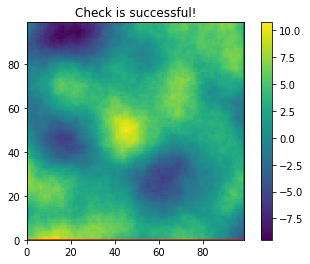

In [30]:
# (1) Perform turning ban simulation
gl.simtub(dbin=None,dbout=db,model=modellmc,nbtuba=1000)
# Plot the grid
gp.grid(db, title="Check is successful!")

# (2) Future :
#gl.simtub(dbout=db,model=modellmc,nbtuba=1000) # Fonction non conditionnelle
#gl.simtubCond(dbin=data, dbout=db,model=model,nbtuba=1000) # Fonction conditionnelle

# (3) Future bis :
#gl.simtub(dbout=db,model=modellmc,nbtuba=1000) # valeur par dfaut partout
#gl.simtub() # autorisé mais génère une erreur car dbout et model sont nuls

# (4) Future far away :
# Cf dossier LibGeostats (model.train, model.setCond, model.simulate, model.estimate)

# => Solution (3) et plus tard solution (4)